In [35]:
from itertools import product
from typing import Dict, List, Any

import numpy as np
import matplotlib.pyplot as plt

from IOData.IOData import InputRule

from simulators.track_simulator import TrackSimulator
from simulators.simulation_settings import SafetyFilterTypes, TrackFilterTypes, SimulationInputRule, ModelType
from tools.simualtion_results import Results

from tools.simple_track_generator import trackGenerator

In [36]:
save_fig = False

simualte_type = 'TRACK_SIMULATE'

Simulator = {
    # 'SINGLE_CURVATURE'  : SingleCurvatureSimulator,
    'TRACK_SIMULATE'    : TrackSimulator,
}.get(simualte_type)

simulator = Simulator()
simulator.use_saved_data = True
simulator.simulate_model_type = ModelType.KINEMATIC
simulator.data_model_type = ModelType.KINEMATIC
simulator.t_sim = 3
simulator.global_initial_state = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
simulator.cur = 1/0.3
simulator.track_fun_name = 'oval_track'

simulator.t_data = 10.0
simulator.data_input_rule = InputRule.RANDOM_2_WITH_MEAN

random_seeds = [0]
track_filter_types = [
    # TrackFilterTypes.SINGLE_SEGMENT_ADD_DATA,
    TrackFilterTypes.SINGLE_SEGMENT,
    ]
filter_types = [
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL,
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL,
    SafetyFilterTypes.INDIRECT_FIX_MU,
    SafetyFilterTypes.INDIRECT_ZERO_V,
    SafetyFilterTypes.INDIRECT_STOP,
    ]
filter_params: Dict[SafetyFilterTypes, List[Dict[str, Any]]] = {
    SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [
        {'lam_sig': 50000, 'L': 100, 'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    ],
    SafetyFilterTypes.INDIRECT_FIX_MU: [
        {'lam_sig': 50000, 'L': 100, 'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    ],
    SafetyFilterTypes.INDIRECT_ZERO_V: [
        {'lam_sig': 50000, 'L': 100, 'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    ],
    SafetyFilterTypes.INDIRECT_STOP: [
        {'lam_sig': 50000, 'L': 100, 'c': [[0.2, 0.1, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    ],
    # SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: [{'lam_sig': 10000}, {'lam_sig': 50000}, {'lam_sig': 100000}],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_STOP: [{'L': 80}],
    # SafetyFilterTypes.INDIRECT_FIX_MU_ADD_DATA_LATERAL: [{'lam_sig': 200000}],
    # SafetyFilterTypes.INDIRECT_FIX_MU: [
    #     # {'lam_sig': 100000, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     {'lam_sig': 200000, 'L': 250, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}
    #     ],
    # SafetyFilterTypes.INDIRECT_ZERO_V: [
    #     {'lam_sig': 80000, 'L': 350, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]}, 
    #     # {'lam_sig': 130000, 'L': 50, 'c': [[0.4, 0.2, 0.05, 0.01], [0.2, 0.1, 0.05, 0.01]]},
    #     ],
    # SafetyFilterTypes.INDIRECT_STOP: [{'lam_sig': 100000}],
    }
simulation_input_rules = [SimulationInputRule.MAX_THROTTLE]


dict_results = simulator.simulate_multi(random_seeds, track_filter_types, filter_types, filter_params, simulation_input_rules)


 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FITTING_TERMINAL, simulation_input_type=SimulationInputRule.MAX_THROTTLE
Fited steady state input: [ 0.         -0.00135665]
Fited steady state output: [ 0.         -0.02070478  0.        ]


/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/LATI.py:138: UserWarning: System not observable!
  warn("System not observable!")
/Users/huangyujun/Library/CloudStorage/OneDrive-ETHZurich/PersonalDocuments/2023SpringETH/DataDrivenSF/simulation/System/ErrorKinematicAcceLATI.py:154: UserWarning: mu is not in [-pi/2, pi/2]
  warn('mu is not in [-pi/2, pi/2]')


Fited steady state input: [0.         0.29605682]
Fited steady state output: [ 0.         -0.16808249  0.        ]
Fited steady state input: [ 0.         -0.00135665]
Fited steady state output: [ 0.         -0.02070478  0.        ]
Fited steady state input: [0.         0.29605682]
Fited steady state output: [ 0.         -0.16808249  0.        ]
Fited steady state input: [ 0.         -0.00135665]
Fited steady state output: [ 0.         -0.02070478  0.        ]
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!
vehicle moved to segment 3!
vehicle moved to segment 4!
vehicle moved to segment 0!
vehicle moved to segment 1!
vehicle moved to segment 2!

 
 Simulating random_seed=0, track_filter_type=TrackFilterTypes.SINGLE_SEGMENT, filter_type=SafetyFilterTypes.INDIRECT_FIX_MU, simulation_input_type=SimulationInputRule.MAX_THROTTLE
vehicle moved to 

KeyboardInterrupt: 

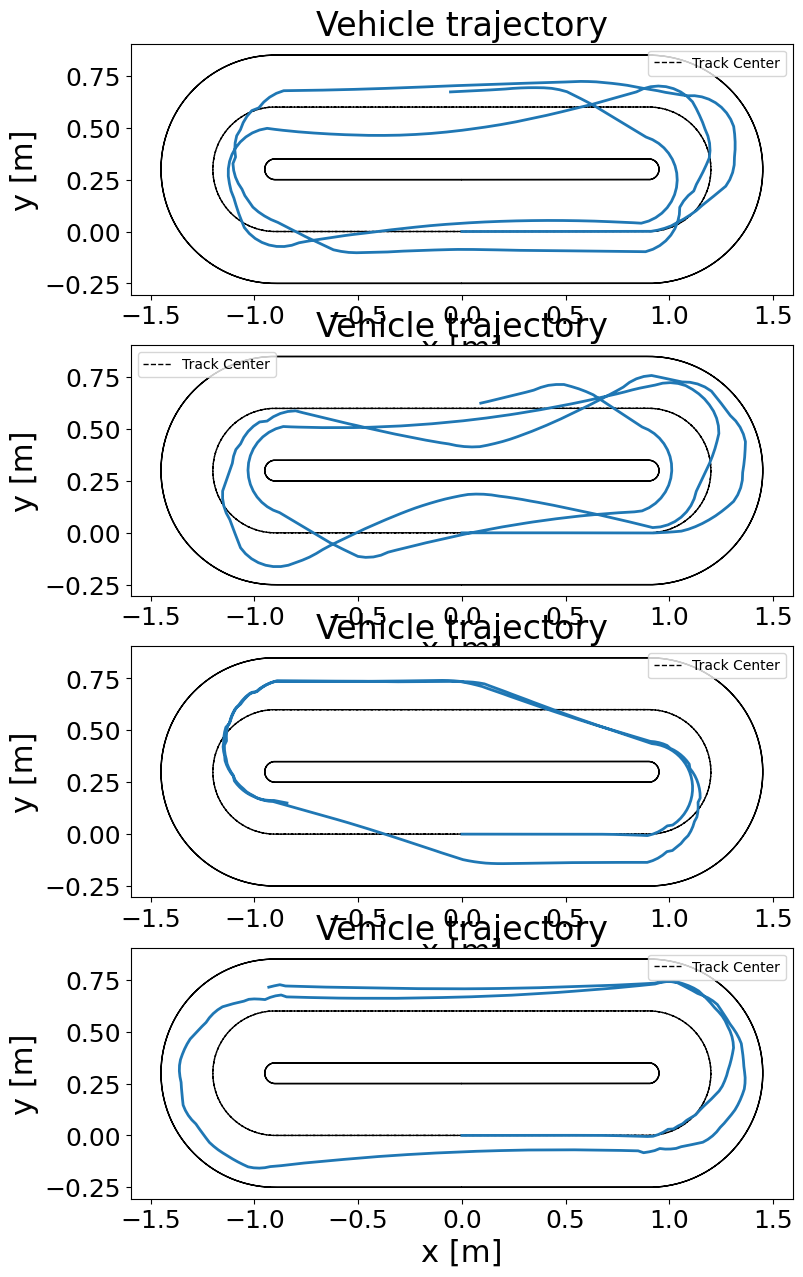

In [ ]:
# plot global trajectory and track
random_seed = random_seeds[0]
n_rows, n_cols = len(filter_types), len(simulation_input_rules)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, squeeze=False, figsize=(20*n_rows,15*n_cols))
for i, j in product(range(n_rows), range(n_cols)):
    results = dict_results[(random_seed, track_filter_types[0], filter_types[i], simulation_input_rules[j])][0]
    if results is not None:
        results.plot_vehicle_trajectory(ax=axs[i,j], gen=simulator.track_generator)
plt.show()
if save_fig:
    fig.savefig('track_simulation.png')

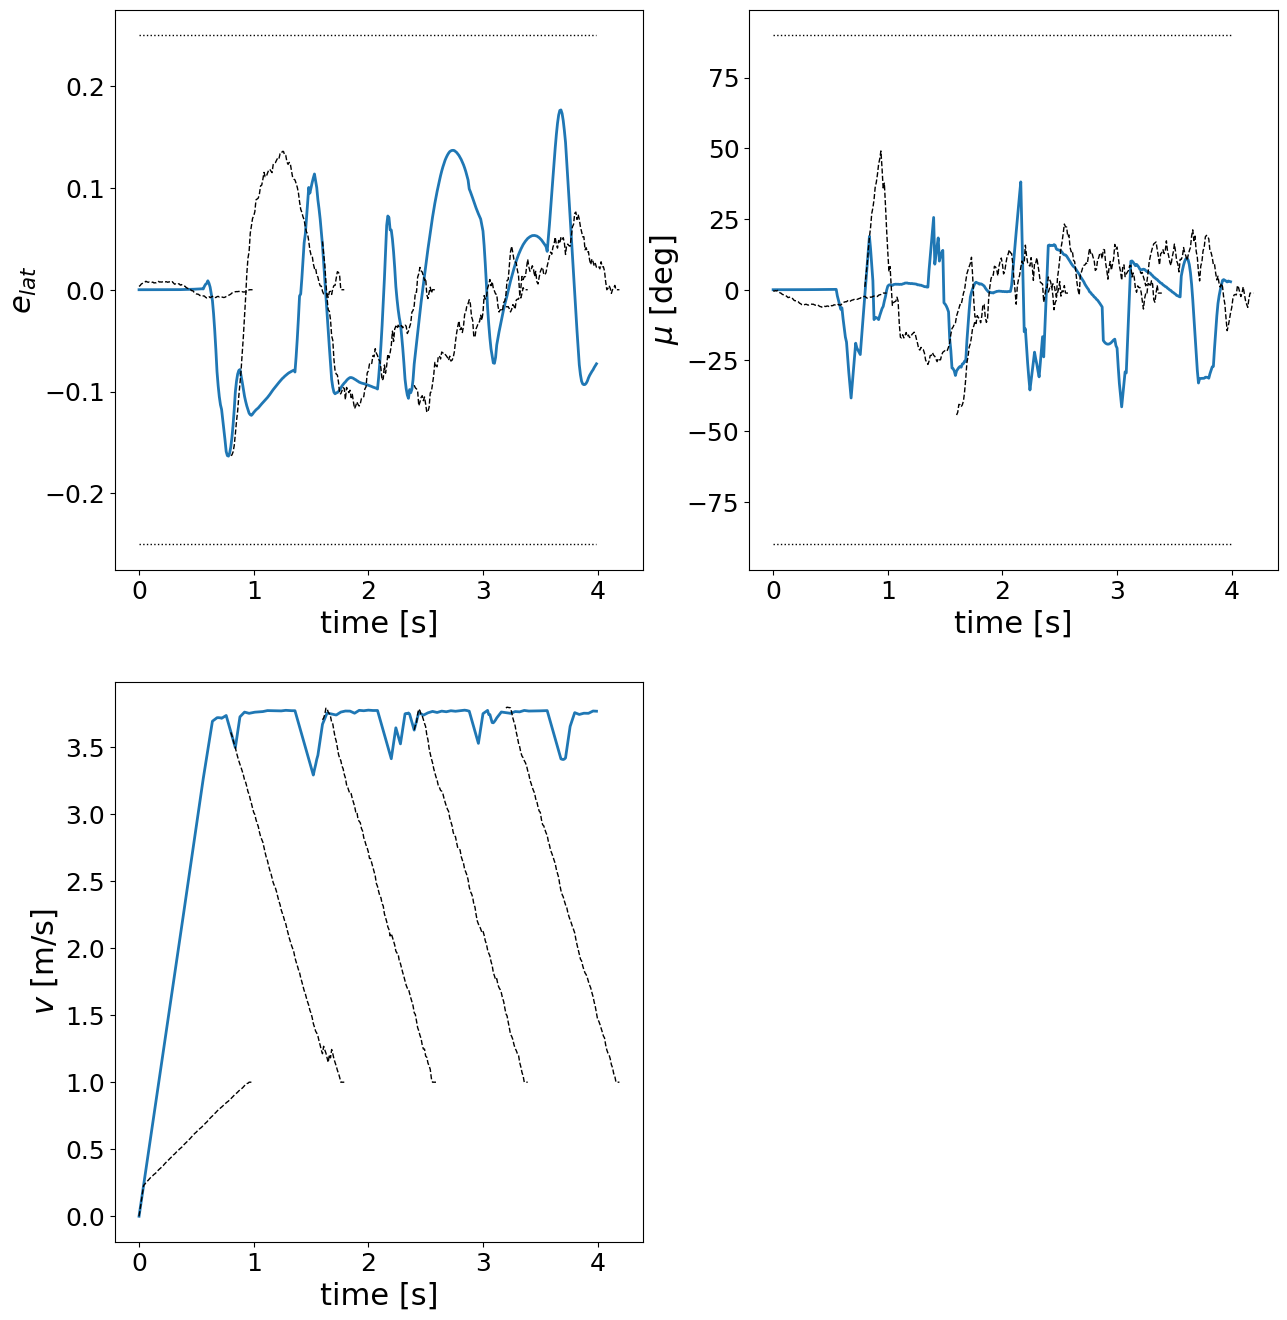

In [ ]:
# choose one result to plot details
results = dict_results[(random_seed, track_filter_types[0], SafetyFilterTypes.INDIRECT_FITTING_TERMINAL, simulation_input_rules[0])][0]

# plot given error dynamics trajectory
plt.figure(figsize=(15,16))
#velocity input
ax = plt.subplot(221)
results.plot_error_trajectory(0, ax, constraint=(-simulator.track_width/2, simulator.track_width/2))
results.plot_predicted_error_slices(0, ax)
ax = plt.subplot(222)
results.plot_error_trajectory(1, ax, constraint=(simulator.mu_min*180/np.pi, simulator.mu_max*180/np.pi))
results.plot_predicted_error_slices(1, ax)
ax = plt.subplot(223)
results.plot_error_trajectory(2, ax)
results.plot_predicted_error_slices(2, ax)
plt.show()

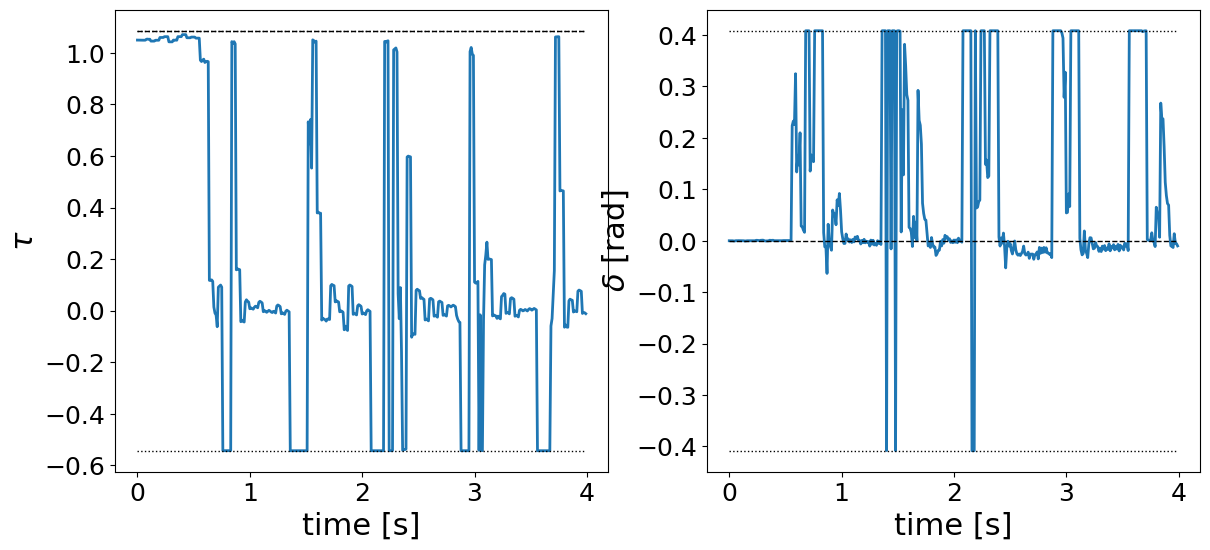

In [ ]:
# plot given and applied inputs
plt.figure(figsize=(14,6))
ax = plt.subplot(121)
results.plot_input_applied(0, ax, constraint=(simulator.a_min*simulator.m, simulator.a_max*simulator.m))
results.plot_input_obj(0, ax)
ax = plt.subplot(122)
results.plot_input_applied(1, ax, constraint=(-simulator.delta_max, simulator.delta_max))
results.plot_input_obj(1, ax)
plt.show(block=True)

In [ ]:
results.calculate_sigma_infty_value()

(1.809112621070641e-06, 0.6086966227954329)

In [ ]:
0.02/np.pi*180

1.1459155902616465

In [ ]:
def plot_average_itervention(ax: plt.Axes, results: Dict[TrackFilterTypes, Results]) -> plt.Axes:
    """Plot the average intervention for the input corresponds to the input."""
    width = 0.3 # width of bar

    x = np.arange(len(results))
    input_names = ['Torque', 'steering']

    offset = -width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[0],2) for result in results.values()], width, label=input_names[0], color='tab:blue')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 2)
    ax.set_ylabel('Torque Intervention')
    ax.legend(loc='upper left', ncols=2)

    ax = ax.twinx()  # instantiate a second axes that shares the same x-axis
    offset = width/2
    rects = ax.bar(x + offset, [round(result.average_intervention[1],2) for result in results.values()], width, label=input_names[1], color='tab:red', hatch='///')
    ax.bar_label(rects, padding=3)
    ax.set_ylim(0, 0.4)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Steering Intervention')
    ax.set_title('MSR Input Intervention for Different Terminal Ingredients')
    ax.set_xticks(x, [key.value for key in results.keys()])
    ax.legend(loc='upper right', ncols=2)
    

{<SafetyFilterTypes.INDIRECT_FITTING_TERMINAL: 'fitting steady state'>: <tools.simualtion_results.Results object at 0x1632017f0>, <SafetyFilterTypes.INDIRECT_FIX_MU: 'fix mu'>: <tools.simualtion_results.Results object at 0x164823ac0>, <SafetyFilterTypes.INDIRECT_ZERO_V: 'stop at \n center line'>: <tools.simualtion_results.Results object at 0x16069f520>, <SafetyFilterTypes.INDIRECT_STOP: 'stop anywhere \n on the track'>: <tools.simualtion_results.Results object at 0x163e88f40>}


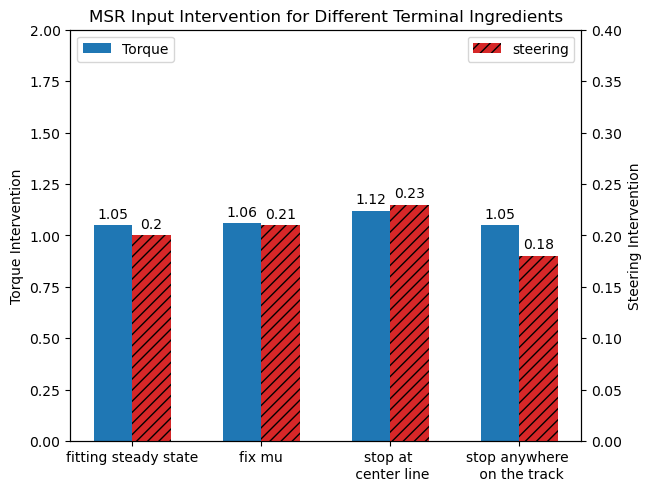

In [ ]:
results_dict_filter_types = {
    key[2]: result_list[0] for key, result_list in dict_results.items()
}
print(results_dict_filter_types)
fig, ax = plt.subplots(layout='constrained')

ax = plot_average_itervention(ax, results_dict_filter_types)

In [ ]:
simulator.systems[0].get_noise()

matrix([[ 0.0014617 ],
        [-0.00052052],
        [ 0.00371427]])

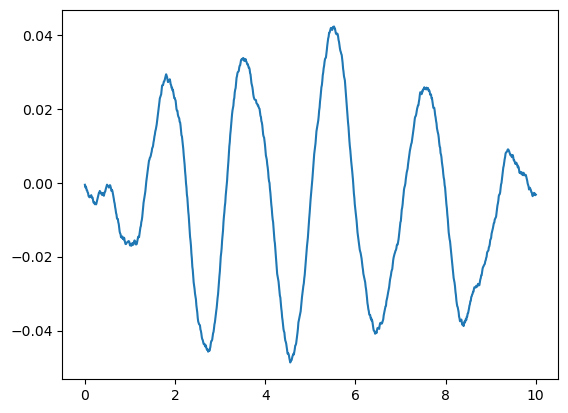

In [ ]:
io_data = simulator.io_data_dict[1/0.3]

plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[0,0] for y in io_data._output_data])

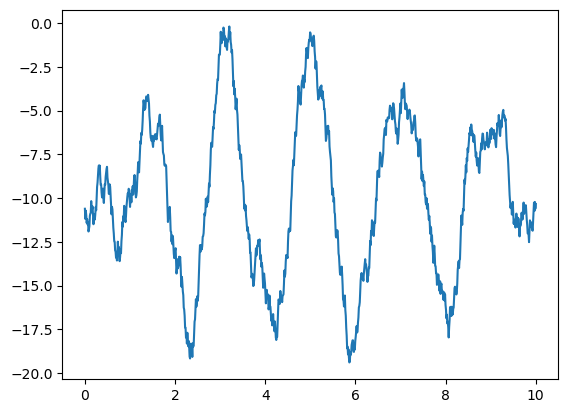

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[1,0]*180/np.pi for y in io_data._output_data])

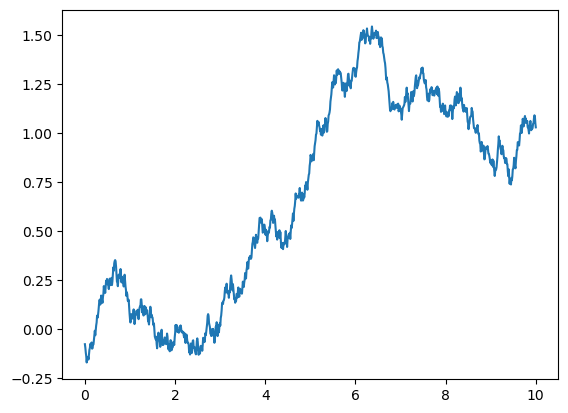

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [y[2,0] for y in io_data._output_data])

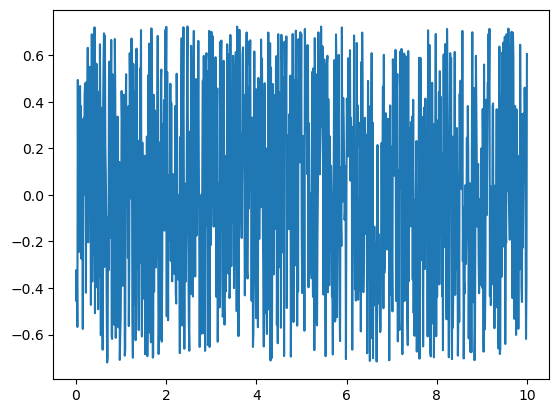

In [ ]:
plt.plot(np.linspace(0, simulator.Ts*io_data.length, io_data.length), [u[0,0] for u in io_data._input_data])

In [ ]:
print(simulator.systems[1].get_zero_input())
print(simulator.systems[1].get_zero_state())

[0.         0.29568153]
[ 0.         -0.17421323  1.          0.        ]
